# Correlation vs. Causation

In many domains, especially in engineering and data analysis, it is important to understand not only the relationships between variables but also how changes in one variable might cause changes in another. Identifying causal relationships allows us to go beyond mere observations and make predictions, informed decisions, and optimise system performance. By identifying causal relationships, engineers and analysts can anticipate the effects of policy changes, technological advancements, or system failures.

In everyday terms, when we say two things are **associated**, we mean that they tend to occur together or change in a similar way. For example, there might be an association between ice cream sales and temperature: when temperatures rise, ice cream sales generally increase. However, this does not necessarily mean that higher temperatures cause more ice cream to be sold. Instead, they are associated because both tend to happen at the same time. There could be a third factor, like summer seasonality, that drives both increases. In statistical terms, association is the relationship between two variables in which changes in one variable are related to changes in another, but without establishing a direct cause-and-effect connection.

In contrast, **causality** refers to a situation where one variable directly influences the other. If a change in $X$ (_the cause_) results in a change in $Y$ (_the effect_), then $X$ is said to cause $Y$. For instance, in the context of an electrical grid, increasing energy demand ($X$) might directly cause an increase in electricity generation ($Y$), assuming that the generation system is designed to meet demand. This causal relationship is often represented as $X \rightarrow Y$, signifying that $X$ is a causal factor for $Y$.

Understanding the difference between association and causation is crucial for effective decision-making. If we mistake an association for a causal relationship, we risk drawing incorrect conclusions and making poor predictions. For example, if we were to assume that increasing ice cream sales causes higher temperatures, we would be making a faulty causal inference. The actual causal factor in this case is likely the season (summer), which both drives up the temperature and increases ice cream sales. Similarly, in fields like engineering, healthcare, or economics, distinguishing between association and causation can dramatically affect how we design systems, implement policies, and evaluate interventions. Only by understanding true causal relationships can we predict the consequences of actions and design systems that are optimized for long-term success.

## Experimental vs. Observational Data

When we seek to understand the underlying mechanisms of a system, our natural instinct is often to run **experiments**. We manipulate different factors in controlled environments and observe the _changes they induce_. We do this even in our daily lives, such as when we experiment with baking a cake at a higher temperature or using less flour. By controlling variables in a systematic way and observing the outcomes, we can establish clear cause-and-effect relationships. This approach is fundamental to scientific research and helps uncover causal links. The data we collect in experiments is called **experimental data**. In experimental settings, _association can often translate to causation_. For example, if we repeatedly bake cakes with varying oven temperatures (keeping all other factors constant) and observe a consistent correlation between higher temperatures and drier cakes, we can reasonably conclude that temperature is a causal factor influencing cake dryness.

However, in many real-world scenarios such as economics, healthcare, or public policy, running controlled experiments can be impractical, expensive, or even unethical. In these cases, researchers rely on **observational data**, which is collected without directly manipulating variables. While observational data can reveal patterns, it introduces challenges, particularly in distinguishing between correlation and causality. Unlike experimental data, where variables are controlled, observational data often includes multiple influencing factors, making it harder to determine true cause-and-effect relationships. For instance, in the baking example, if we only observe data on cake dryness and baking temperatures from various sources without controlling other factors, it would be more difficult to draw causal conclusions. We might see a correlation between temperature and dryness, but without controlling the other variables (like flour type, oven settings, or baking time), we cannot be sure that temperature is the sole cause of the dryness.


**Causal inference** is the statistical approach that bridges this gap between experimental and observational data. It focuses on determining cause-and-effect relationships even when no direct experimentation has occurred. Unlike correlation analysis, which only measures how variables change together, causal inference seeks to understand whether and how one variable influences another. This distinction is crucial for informed decision-making across various fields, including economics, healthcare, and energy markets. The familiar phrase _“correlation does not imply causation”_ is a reminder not to rush to conclusions based on mere associations. Yet, despite this caution, business decisions are often made based solely on correlations, without considering the underlying causal mechanisms. In the electricity market, for example, understanding causal relationships is vital. It allows stakeholders to predict the effects of policy changes, adjust pricing strategies, and evaluate the impact of technological innovations on supply and demand. By applying causal inference, we can make more accurate predictions and support strategic, data-driven decisions.

## A Motivating Example

To illustrate the distinction between correlation and causation, consider a simple example involving three variables:
1. Temperature (°C)
2. Electricity load (MW)
3. Ice cream sales (GBP)

To better understand the relationships among these variables, we can use a **causal graph** to represent the data-generating process. At this stage, there is no need to focus on the technical details of causal graphs, as these concepts will be explored in more depth in later chapters. For now, consider that the graph helps us visualise and understand how changes in temperature drive changes in both electricity consumption and ice cream sales.

In the case of the three variables (temperature, electricity load, and ice cream sales) we observe two distinct relationships:
- The relationship between temperature and electricity load often shows a U-shaped pattern. During very cold weather, electricity demand increases due to heating needs. Similarly, during very hot weather, electricity load rises because of the increased use of air conditioning. This U-shape reflects higher energy consumption at both temperature extremes.
- Temperature also directly affects ice cream sales. In general, as temperatures rise, people are more likely to buy ice cream to cool down. Thus, we observe that as the temperature increases, so do ice cream sales.

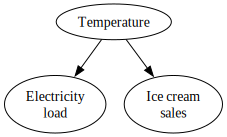

In [1]:
import graphviz
from IPython.display import display

# Create a new graph
dot = graphviz.Digraph()

# Add nodes
dot.node('T', 'Temperature')
dot.node('L', 'Electricity\nload')
dot.node('I', 'Ice cream\nsales')

# Add edges
dot.edge('T', 'L')
dot.edge('T', 'I')

# Display the graph in the notebook
display(dot)

We will now generate some data based on the causal structure presented above. For this exercise, we will assume that we do not know the true causal relationships and must rely on **exploratory analysis** to identify potential correlations within the data.

In this scenario, our objective is to explore the data, search for correlations, and attempt to infer possible causal relationships, all without prior knowledge of the underlying mechanisms that govern the system. This mirrors real-world situations in which data scientists and researchers often work with complex datasets, where the relationships between variables are not immediately clear, and the true causes are unknown.

Through the use of statistical methods and visual analysis, we will examine the interactions between temperature, electricity load, and ice cream sales. We will look for patterns in the data and consider how these variables might be connected, while also reflecting on the implications of our findings for identifying potential causal relationships.

To begin, we will **generate data** according to the causal graph shown above, allowing us to explore these relationships systematically.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Setting a random seed for reproducibility
np.random.seed(42)

# Generating synthetic data
n = 100000
temperatures = np.random.normal(20, 5, n)  # average temperature in Celsius
electricity_load = 0.2 * (temperatures - 20)**2 + 70 + np.random.normal(0, 5, n)  # Quadratic relationship for U-shape
ice_cream_sales = 5* temperatures + np.random.normal(0, 20, n)  # also influenced by temperature

# Creating a DataFrame
data = pd.DataFrame({'Temperature': temperatures, 'Electricity Load': electricity_load, 'Ice Cream Sales': ice_cream_sales})

data.head()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


,Temperature,Electricity Load,Ice Cream Sales
0,22.483571,76.386598,143.654668
1,19.308678,64.318811,94.658826
2,23.238443,74.974688,89.601501
3,27.615149,78.501907,110.302984
4,18.829233,68.637125,87.293150


Next, we will generate **pairwise correlation plots** to examine the relationships and dependencies between the variables. These plots will help us visually identify how the variables are related to each other and reveal any potential patterns or associations. By analysing these plots, we can begin to gain insights into the structure of the data, which will inform further exploration of possible causal links.

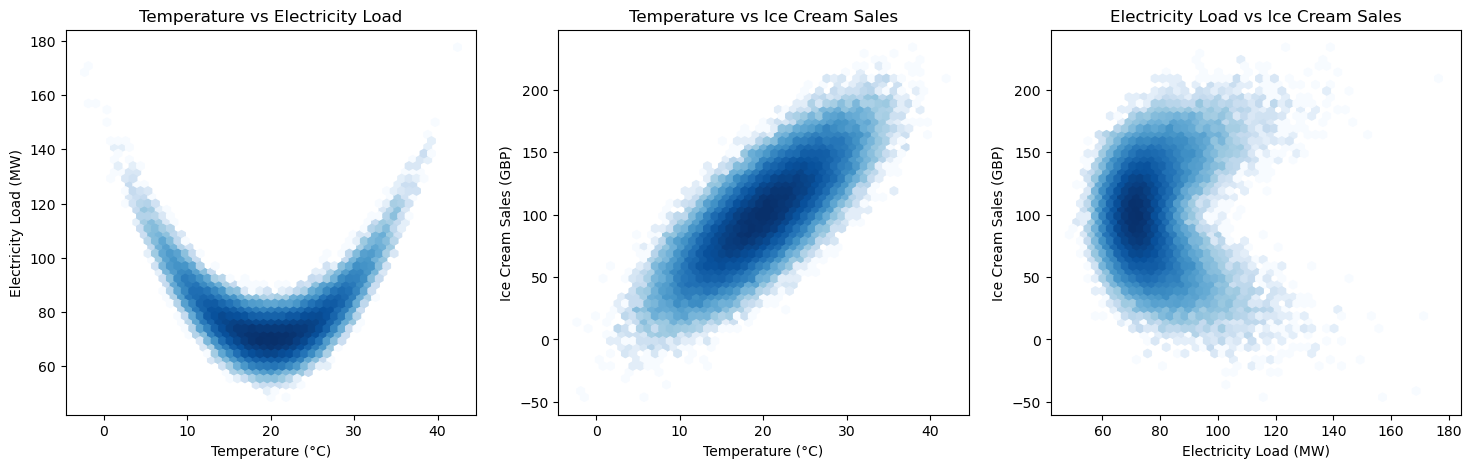

In [3]:
# Setting up the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs Electricity Load with hexbin plot
hb1 = axes[0].hexbin(data['Temperature'], data['Electricity Load'], gridsize=50, cmap='Blues', bins='log')
axes[0].set_title('Temperature vs Electricity Load')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Electricity Load (MW)')

# Temperature vs Ice Cream Sales with hexbin plot
hb2 = axes[1].hexbin(data['Temperature'], data['Ice Cream Sales'], gridsize=50, cmap='Blues', bins='log')
axes[1].set_title('Temperature vs Ice Cream Sales')
axes[1].set_xlabel('Temperature (°C)')
axes[1].set_ylabel('Ice Cream Sales (GBP)')

# Electricity Load vs Ice Cream Sales with hexbin plot
hb3 = axes[2].hexbin(data['Electricity Load'], data['Ice Cream Sales'], gridsize=50, cmap='Blues', bins='log')
axes[2].set_title('Electricity Load vs Ice Cream Sales')
axes[2].set_xlabel('Electricity Load (MW)')
axes[2].set_ylabel('Ice Cream Sales (GBP)')

plt.show()

By examining the first two subplots, we observe the true relationships: a U-shaped correlation between temperature and electricity load, and a linear correlation between temperature and ice cream sales. These patterns are consistent with the underlying causal structure, where temperature directly influences both electricity demand and ice cream consumption. However, the third subplot reveals a potential pitfall in data analysis. Here, we observe a correlation between electricity load and ice cream sales, but this relationship is actually a **spurious correlation**. Although the variables appear to be related, they are, in fact, unrelated and the observed pattern is merely a coincidental association due to a **common underlying factor**, namely temperature. This highlights a crucial issue in data analysis: the temptation to infer causality from correlation, even when the correlation is spurious. The underlying mechanisms that generate these correlations are often more complex, and without a clear understanding of the causal structure, it is easy to misinterpret such associations. This phenomenon of spurious correlations and the methods to address it will be explored in more detail in the following chapters, where we will discuss the flow of causation and association within causal graphs.